In [62]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_csv("/Users/esrefyigitbas/Downloads/17-googleplaystore.csv")
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [64]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [65]:
df.shape

(10841, 13)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [67]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


In [68]:
#eksik değerler
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [69]:
df["Reviews"].value_counts()

Reviews
0         596
1         272
2         214
3         175
4         137
         ... 
342912      1
4272        1
5517        1
4057        1
398307      1
Name: count, Length: 6002, dtype: int64

In [70]:
df["Reviews"].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [71]:
df["Reviews"].str.isnumeric().sum()

10840

10841 satır ögeden 10840 tanesi sayısal, 1 tanesi string değer

In [72]:
df[~df["Reviews"].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [73]:
df_clean = df.copy()

In [74]:
df_clean = df_clean.drop(df_clean.index[10472])

In [75]:
df_clean[~df_clean["Reviews"].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [76]:
df_clean["Reviews"]=df_clean["Reviews"].astype(int)

In [77]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [78]:
df_clean["Size"].value_counts()

Size
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
430k                     1
429k                     1
200k                     1
460k                     1
619k                     1
Name: count, Length: 461, dtype: int64

In [79]:
df_clean["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

Sayısal değerlere sahip değişkenleri M yi k ya çevirip daha doğru bir analiz gerçekleştirilmeli

In [80]:
df_clean["Size"]=df_clean["Size"].str.replace("M", "000")
df_clean["Size"]=df_clean["Size"].str.replace("k", "")

In [81]:
df_clean["Size"]

0                     19000
1                     14000
2                    8.7000
3                     25000
4                    2.8000
                ...        
10836                 53000
10837                3.6000
10838                9.5000
10839    Varies with device
10840                 19000
Name: Size, Length: 10840, dtype: object

In [82]:
df_clean["Size"]=df_clean["Size"].replace('Varies with device', np.nan)

In [83]:
df_clean["Size"]=df_clean["Size"].astype(float)

In [84]:
df_clean["Size"]

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10840, dtype: float64

In [85]:
df_clean.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [86]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


In [87]:
df_clean["Installs"].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [88]:
df_clean["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [89]:
df_clean["Price"].value_counts()

Price
0         10040
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$19.90        1
$1.75         1
$14.00        1
$4.85         1
$1.04         1
Name: count, Length: 92, dtype: int64

In [90]:
df_clean["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [91]:
chars_to_remove=["+",",","$"]
cols_to_clean=["Installs","Price"]
for item in chars_to_remove:
    for cols in cols_to_clean:
        df_clean[cols]=df_clean[cols].str.replace(item,"")

In [92]:
df_clean["Price"].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [93]:
df_clean["Installs"].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [94]:
df_clean["Price"]=df_clean["Price"].astype(float)

In [95]:
df_clean["Installs"]=df_clean["Installs"].astype(int)

In [96]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


In [97]:
df_clean["Last Updated"]

0         January 7, 2018
1        January 15, 2018
2          August 1, 2018
3            June 8, 2018
4           June 20, 2018
               ...       
10836       July 25, 2017
10837        July 6, 2018
10838    January 20, 2017
10839    January 19, 2015
10840       July 25, 2018
Name: Last Updated, Length: 10840, dtype: object

In [98]:
df_clean["Last Updated"] = pd.to_datetime(df_clean["Last Updated"])
df_clean["Day"] = df_clean["Last Updated"].dt.day
df_clean["Month"] = df_clean["Last Updated"].dt.month
df_clean["Year"] = df_clean["Last Updated"].dt.year

In [99]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  Day             10840 non-null  int32         
 14  Month           10840 non-null  int32         
 15  Year   

In [100]:
df_clean[df_clean.duplicated('App')].shape

(1181, 16)

In [101]:
df_clean=df_clean.drop_duplicates(subset=['App'],keep='first')

In [102]:
df_clean.shape

(9659, 16)

In [103]:
numeric_features = [feature for feature in df_clean.columns if df_clean[feature].dtype != 'O']
categorical_features = [feature for feature in df_clean.columns if df_clean[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))


We have 9 numerical features : ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'Day', 'Month', 'Year']

We have 7 categorical features : ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


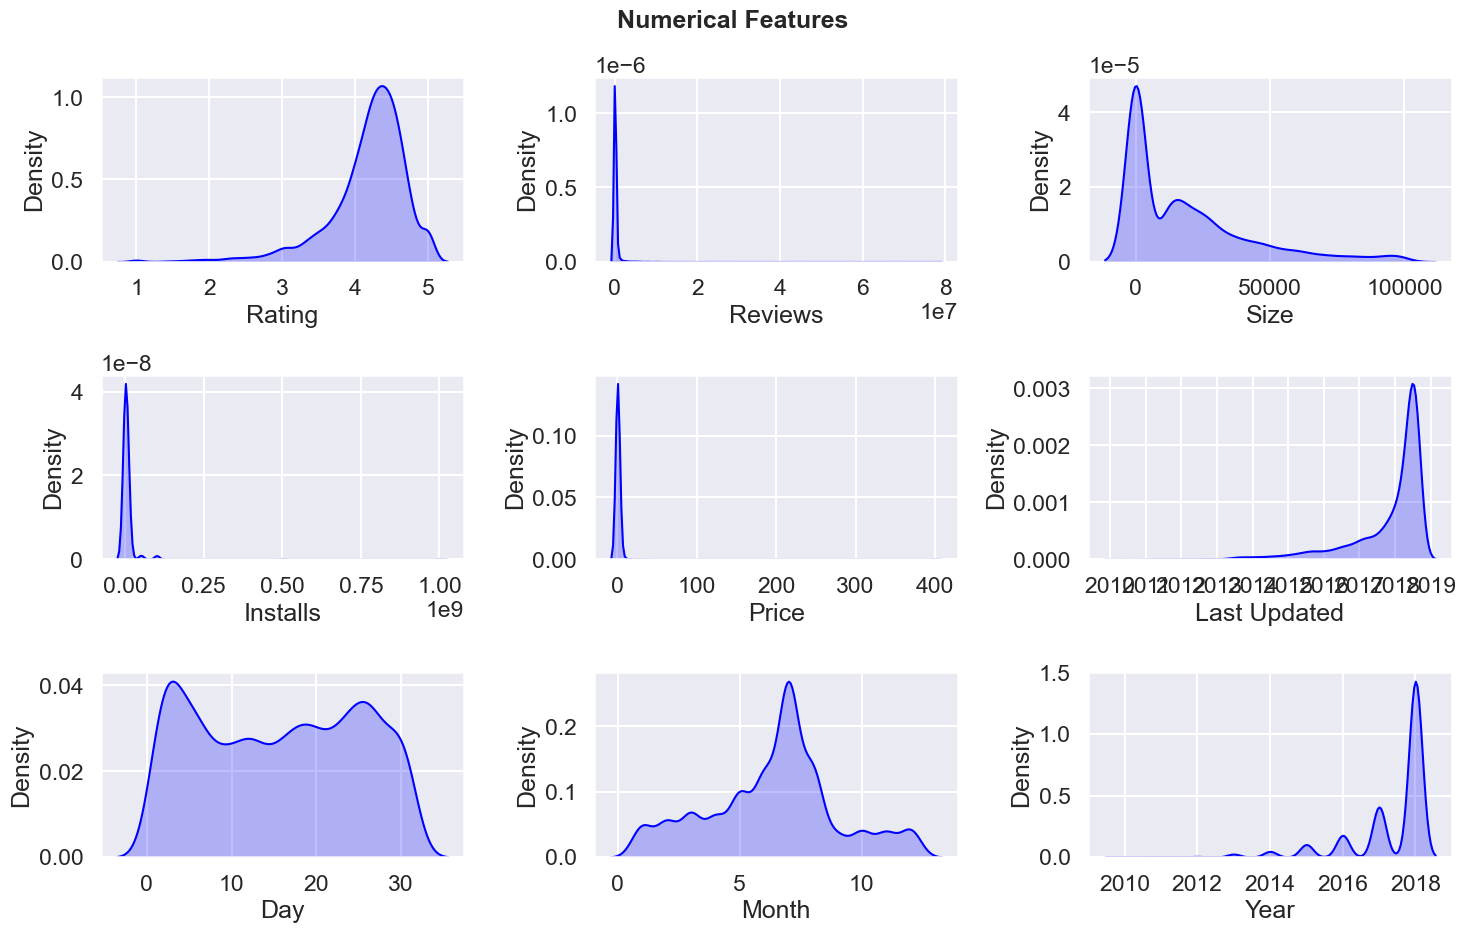

In [104]:
plt.figure(figsize=(15, 15))
plt.suptitle('Numerical Features', fontsize=18, fontweight='bold')

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df_clean[numeric_features[i]],fill=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
plt.show()

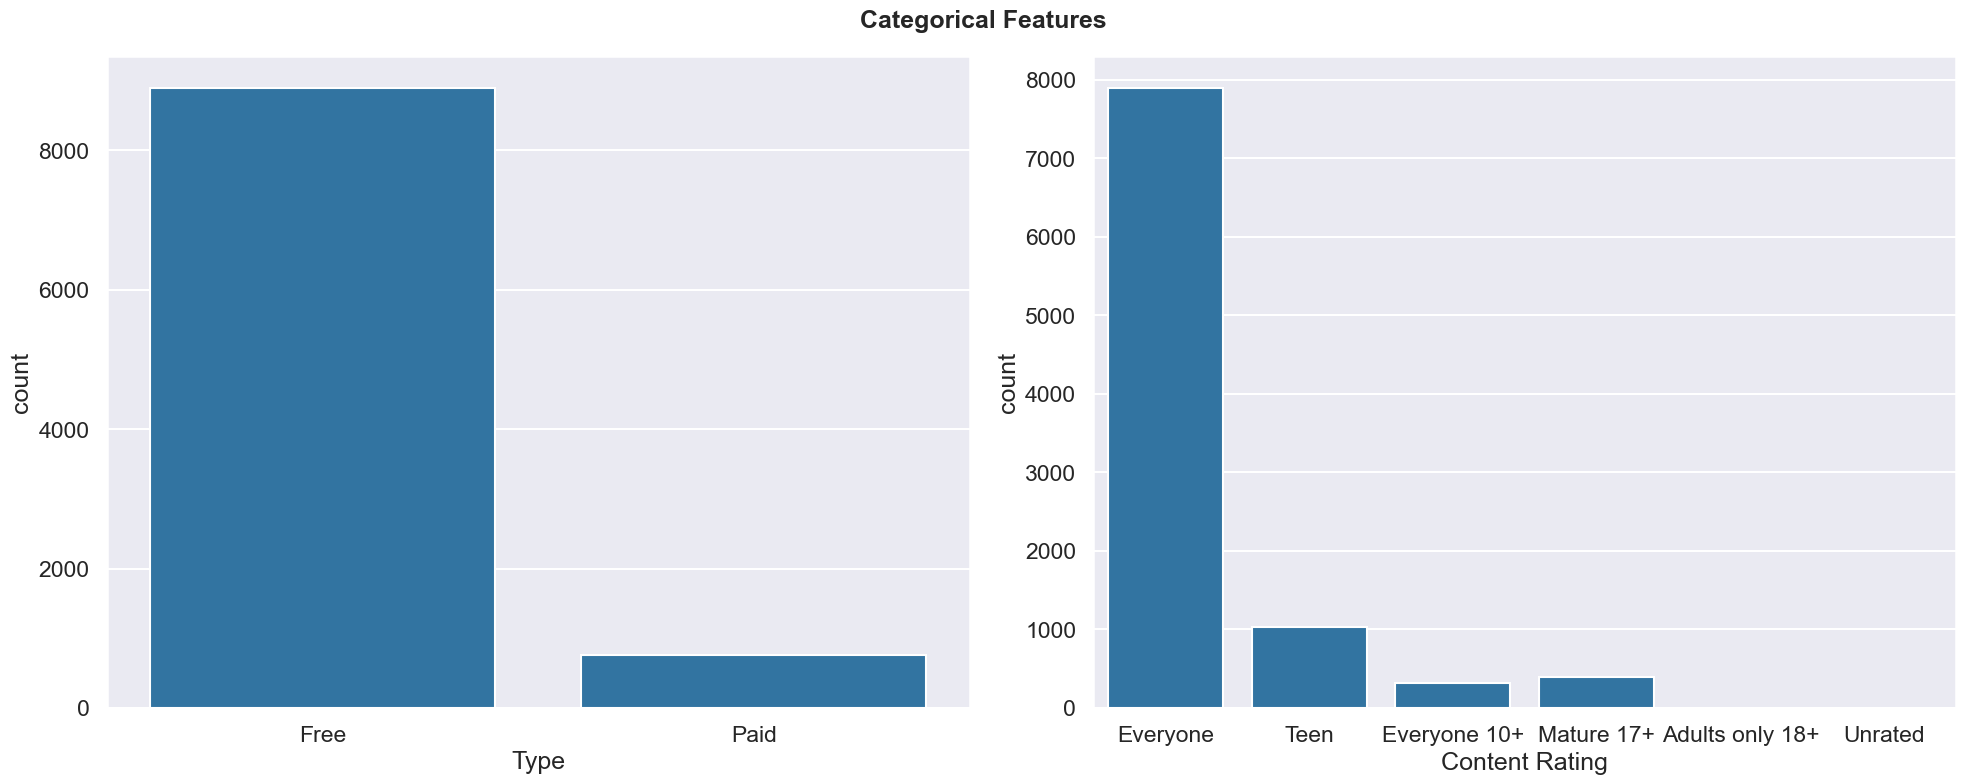

In [105]:
plt.figure(figsize=(20, 15))
plt.suptitle('Categorical Features', fontsize=18, fontweight='bold')
category = ['Type', 'Content Rating']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df_clean[category[i]])
    plt.xlabel(category[i])
    plt.tight_layout() 
plt.show()

In [106]:
df_clean.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [107]:
#Kategorilere göre sayısal miktar
df_clean['Category'].value_counts()

Category
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: count, dtype: int64

In [110]:
#Kategorilere göre indirme sayısı sıralama
df_cat_installs  = df_clean.groupby("Category").agg({"Installs":sum}).reset_index()
df2 = df_cat_installs.sort_values("Installs",ascending = False)
df2

/var/folders/f3/_hyvf4jx3n7c142q6ywwcvwc0000gn/T/ipykernel_53655/3224104312.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_cat_installs  = df_clean.groupby("Category").agg({"Installs":sum}).reset_index()


,Category,Installs
14,GAME,13878924415
6,COMMUNICATION,11038276251
29,TOOLS,8001771915
25,PRODUCTIVITY,5793091369
27,SOCIAL,5487867902
24,PHOTOGRAPHY,4649147655
11,FAMILY,4427941505
31,VIDEO_PLAYERS,3926902720
30,TRAVEL_AND_LOCAL,2894887146
21,NEWS_AND_MAGAZINES,2369217760


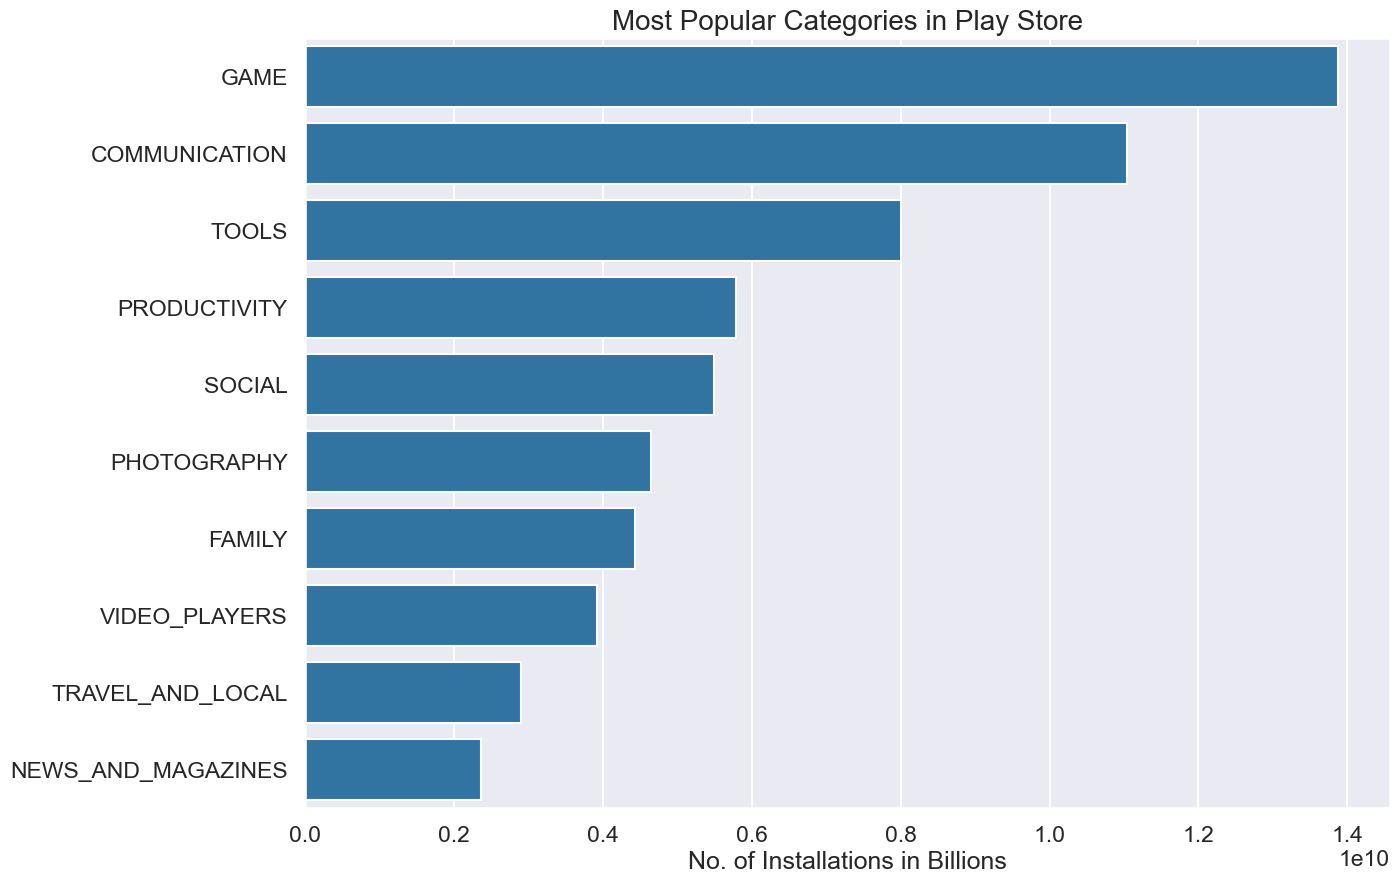

In [112]:
#En yüksek indirime sahip 10 kategori
df2_data = df2.head(10)
plt.figure(figsize = (14,10))
sns.set_context("talk")
sns.set_style("darkgrid")

ax = sns.barplot(x = 'Installs' , y = 'Category' , data = df2_data )
ax.set_xlabel('No. of Installations in Billions')
ax.set_ylabel('')
ax.set_title("Most Popular Categories in Play Store", size = 20)
plt.show()


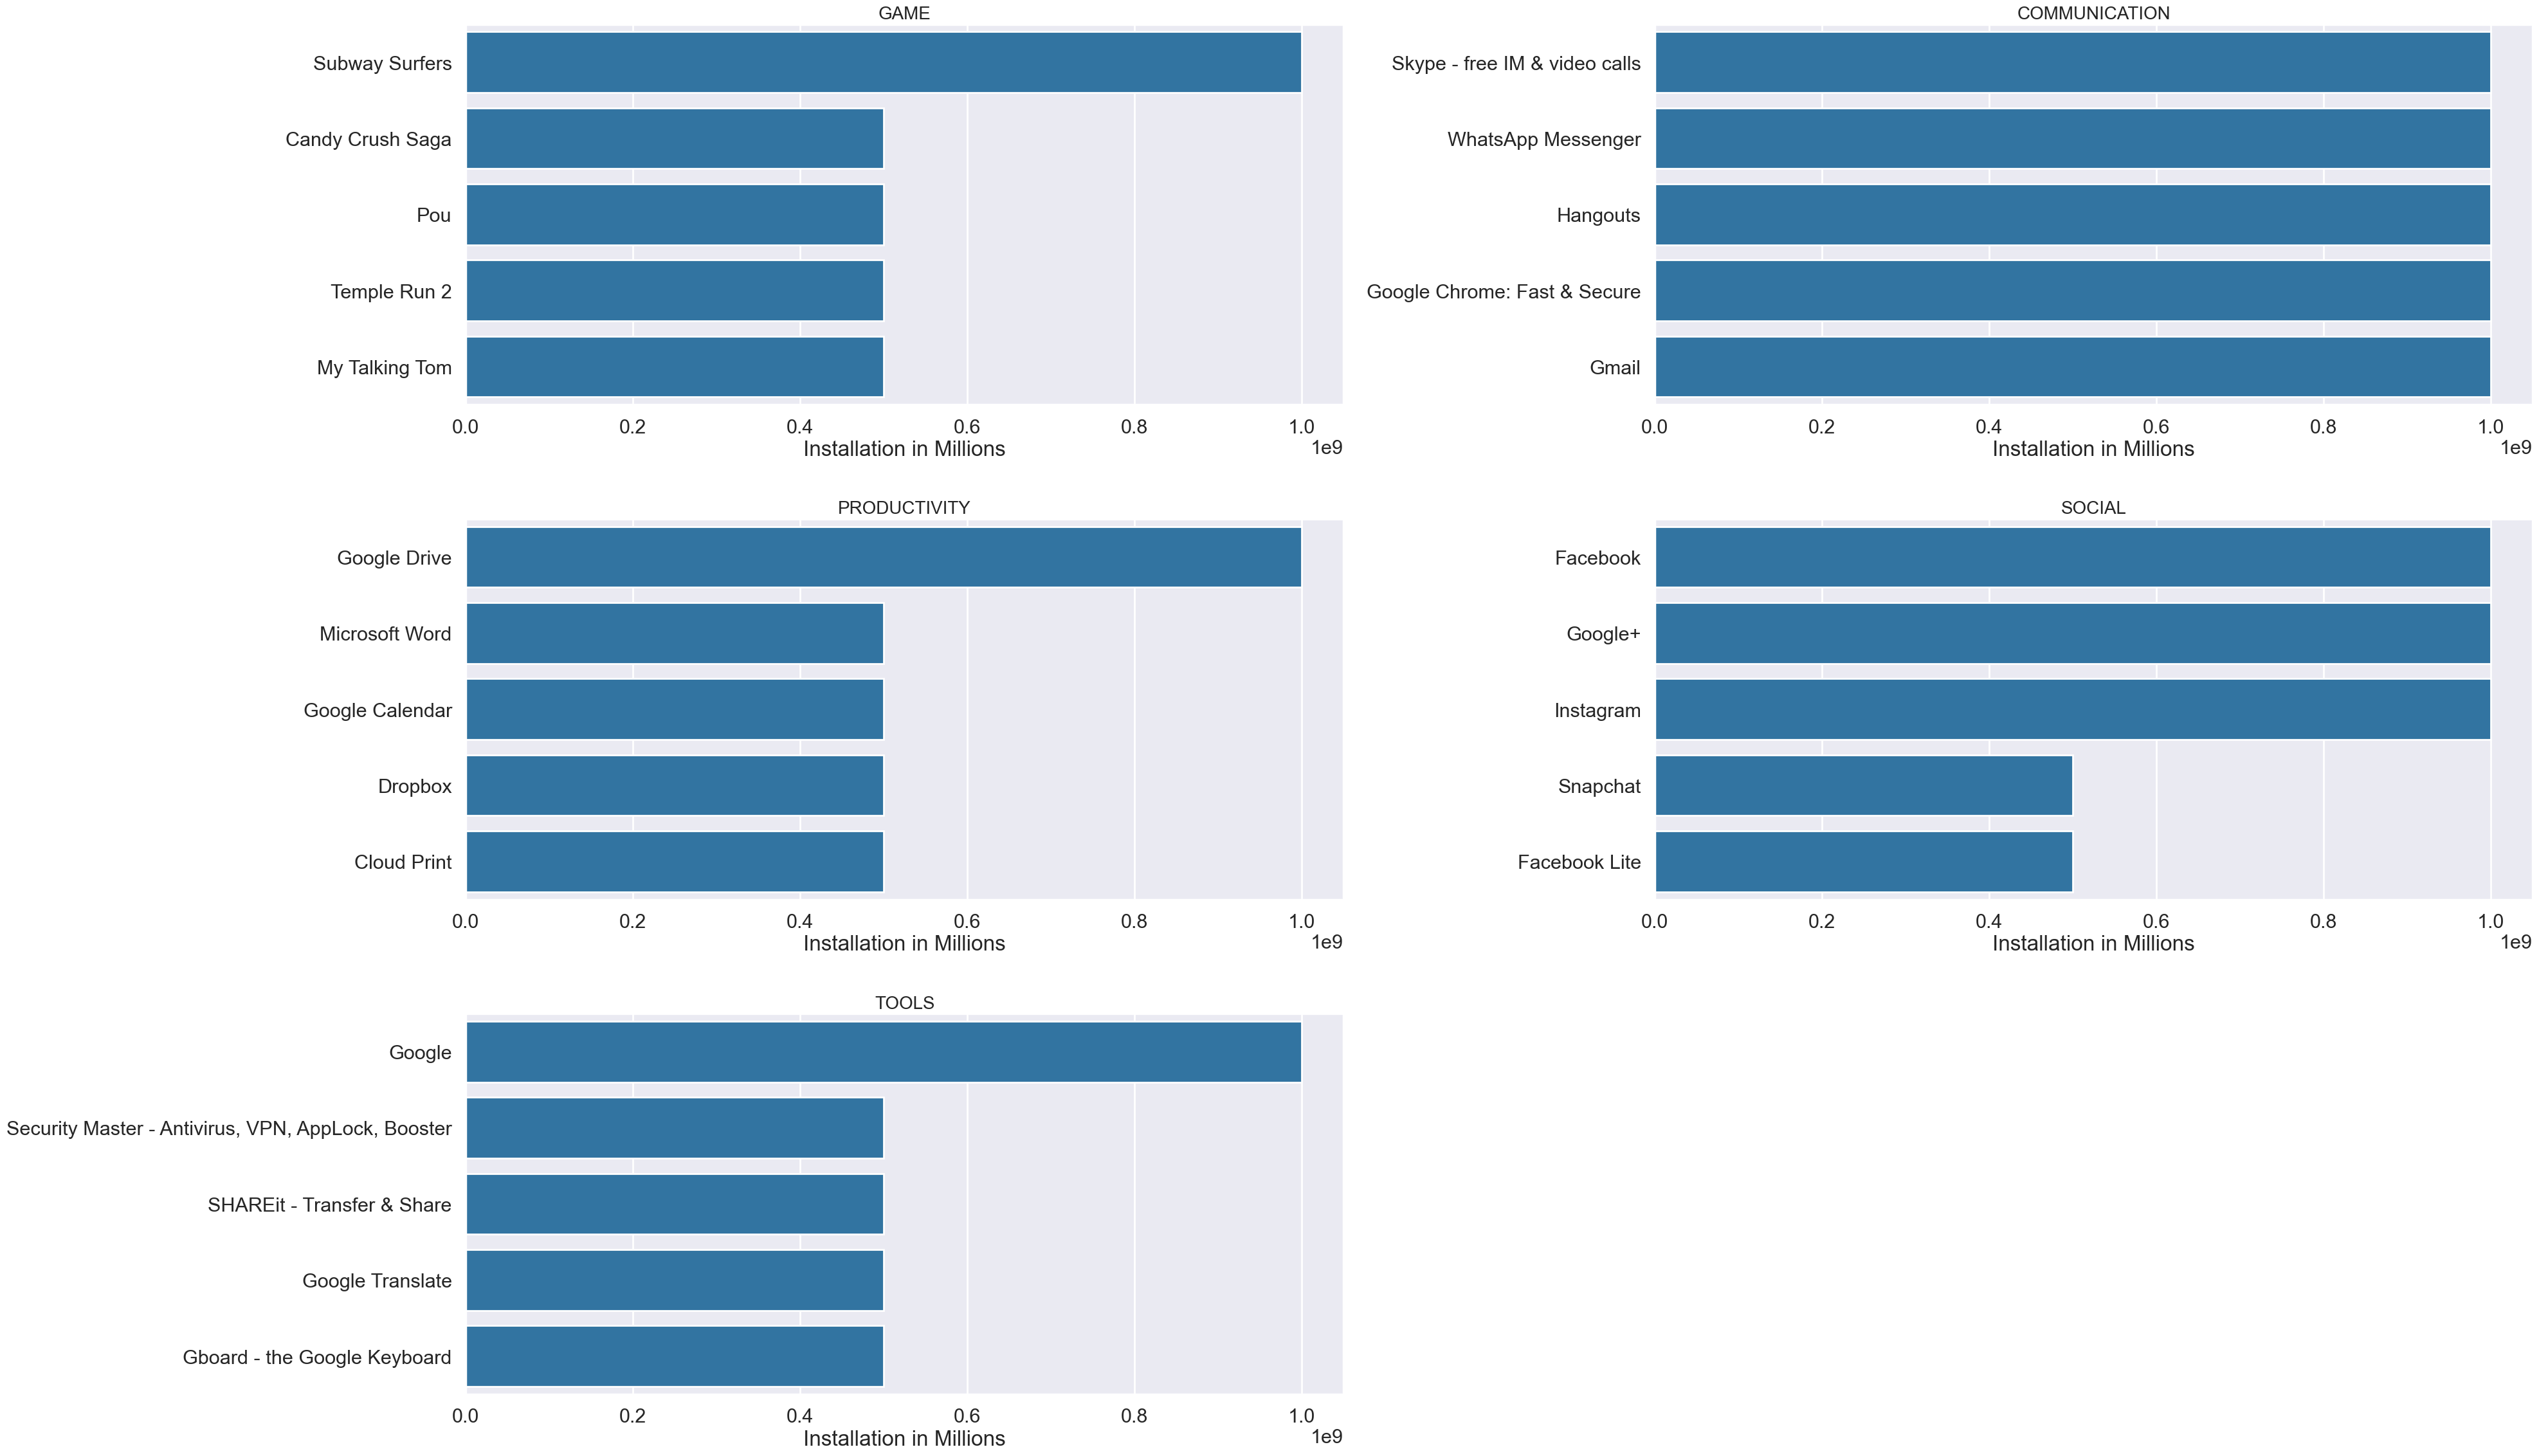

In [114]:
#Kategori Dağılımına göre en fazla indirilmiş 5 uygulama
df_app_category = df_clean.groupby(['Category' ,'App'])['Installs'].sum().reset_index()
df_app_category = df_app_category.sort_values('Installs', ascending = False)
apps = ['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL' ,'TOOLS']
sns.set_context("poster")
sns.set_style("darkgrid")

plt.figure(figsize=(40,30))

for i,app in enumerate(apps):
    df2 = df_app_category[df_app_category.Category == app]

    #get only 5
    df_top_5 = df2.head(5)
    plt.subplot(4,2,i+1)
    sns.barplot(data= df_top_5,x= 'Installs' ,y='App' )
    plt.xlabel('Installation in Millions')
    plt.ylabel('')
    plt.title(app,size = 20)
    
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

In [126]:
#Puanı 5 e eşit olan kaç tane uygulama var
df_raiting = df_clean[df_clean["Rating"]== 5]
df_raiting.shape 

(271, 16)

271 uygulama 5 puana sahip

### Veri temizliğine devam

In [127]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          8196 non-null   float64       
 3   Reviews         9659 non-null   int64         
 4   Size            8432 non-null   float64       
 5   Installs        9659 non-null   int64         
 6   Type            9658 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9651 non-null   object        
 12  Android Ver     9657 non-null   object        
 13  Day             9659 non-null   int32         
 14  Month           9659 non-null   int32         
 15  Year    

In [128]:
df_clean["Android Ver"]

0              4.0.3 and up
1              4.0.3 and up
2              4.0.3 and up
3                4.2 and up
4                4.4 and up
                ...        
10836            4.1 and up
10837            4.1 and up
10838            2.2 and up
10839    Varies with device
10840    Varies with device
Name: Android Ver, Length: 9659, dtype: object

In [129]:
df_clean['Android Ver']=df_clean['Android Ver'].replace('and up', '', regex=True)

In [130]:
df_clean['Android Ver']

0                    4.0.3 
1                    4.0.3 
2                    4.0.3 
3                      4.2 
4                      4.4 
                ...        
10836                  4.1 
10837                  4.1 
10838                  2.2 
10839    Varies with device
10840    Varies with device
Name: Android Ver, Length: 9659, dtype: object

In [132]:
df_clean['Android Ver'].value_counts()

Android Ver
4.1                   2202
4.0.3                 1395
4.0                   1285
Varies with device     990
4.4                    818
2.3                    616
5.0                    512
4.2                    372
2.3.3                  273
2.2                    239
3.0                    231
4.3                    221
2.1                    133
1.6                    116
6.0                     54
7.0                     42
3.2                     36
2.0                     32
5.1                     22
1.5                     20
4.4W                    11
3.1                     10
2.0.1                    7
8.0                      6
7.1                      3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0                      2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: count, dtype: int64

In [137]:
df_clean['Android Ver']=df_clean['Android Ver'].replace('Varies with device', '', regex=True).replace('W', '', regex=True).replace('', np.nan)


In [138]:
df_clean['Android Ver'].value_counts()

Android Ver
4.1              2202
4.0.3            1395
4.0              1285
4.4               829
2.3               616
5.0               512
4.2               372
2.3.3             273
2.2               239
3.0               231
4.3               221
2.1               133
1.6               116
6.0                54
7.0                42
3.2                36
2.0                32
5.1                22
1.5                20
3.1                10
2.0.1               7
8.0                 6
7.1                 3
4.0.3 - 7.1.1       2
5.0 - 8.0           2
1.0                 2
7.0 - 7.1.1         1
4.1 - 7.1.1         1
5.0 - 6.0           1
2.2 - 7.1.1         1
5.0 - 7.1.1         1
Name: count, dtype: int64

In [141]:
df_clean.loc[df_clean['Android Ver'].str.contains('-') == True]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
350,Web Browser & Explorer,COMMUNICATION,4.0,36901,6.6,5000000,Free,0.0,Everyone,Communication,2018-07-04,11.8.6,4.0.3 - 7.1.1,4,7,2018
352,Browser 4G,COMMUNICATION,4.3,192948,6.6,10000000,Free,0.0,Everyone,Communication,2018-06-19,24.6.6,4.0.3 - 7.1.1,19,6,2018
1572,ZenUI Safeguard,LIFESTYLE,4.5,100,7.1,1000000,Free,0.0,Everyone,Lifestyle,2018-05-09,1.0.0.21_180410,7.0 - 7.1.1,9,5,2018
2841,Photo Collage - Layout Editor,PHOTOGRAPHY,4.5,285788,46000.0,10000000,Free,0.0,Everyone,Photography,2017-12-04,1.8.0.170824_9,5.0 - 8.0,4,12,2017
3474,ASUS Quick Memo,PRODUCTIVITY,4.5,23089,1.6,10000000,Free,0.0,Everyone,Productivity,2018-04-11,1.10.0.33_180403,5.0 - 8.0,11,4,2018
4151,Google Now Launcher,TOOLS,4.2,857215,7.9,100000000,Free,0.0,Everyone,Tools,2017-12-07,1.4.large,4.1 - 7.1.1,7,12,2017
7571,My Style CM 13 Theme,PERSONALIZATION,4.5,314,11000.0,10000,Free,0.0,Everyone,Personalization,2016-09-08,1.9,5.0 - 6.0,8,9,2016
9310,EF Jumper,GAME,NaN,4,5.1,100,Free,0.0,Everyone,Arcade,2017-07-13,Build 12,2.2 - 7.1.1,13,7,2017
10094,EY Catalyst Reader,BUSINESS,NaN,1,8.4,5,Free,0.0,Everyone,Business,2018-04-10,1.2.1,5.0 - 7.1.1,10,4,2018


In [142]:
df_clean = df_clean.loc[df_clean["Android Ver"].str.contains("-") == False]

In [147]:
df_clean['Android Ver'].value_counts()

Android Ver
4.1       2202
4.0.3     1395
4.0       1285
4.4        829
2.3        616
5.0        512
4.2        372
2.3.3      273
2.2        239
3.0        231
4.3        221
2.1        133
1.6        116
6.0         54
7.0         42
3.2         36
2.0         32
5.1         22
1.5         20
3.1         10
2.0.1        7
8.0          6
7.1          3
1.0          2
Name: count, dtype: int64

In [146]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8658 entries, 0 to 10838
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             8658 non-null   object        
 1   Category        8658 non-null   object        
 2   Rating          7240 non-null   float64       
 3   Reviews         8658 non-null   int64         
 4   Size            8375 non-null   float64       
 5   Installs        8658 non-null   int64         
 6   Type            8658 non-null   object        
 7   Price           8658 non-null   float64       
 8   Content Rating  8658 non-null   object        
 9   Genres          8658 non-null   object        
 10  Last Updated    8658 non-null   datetime64[ns]
 11  Current Ver     8650 non-null   object        
 12  Android Ver     8658 non-null   object        
 13  Day             8658 non-null   int32         
 14  Month           8658 non-null   int32         
 15  Year    

##### Her tür için ortalama yükleme hesaplama(Milyonda kaç?)

In [151]:
mean_genres_installs=df_clean.groupby("Genres")["Installs"].mean()/1_000_000

In [152]:
mean_genres_installs

Genres
Action                                   11.255844
Action;Action & Adventure                 3.910955
Adventure                                 4.064319
Adventure;Action & Adventure             21.230000
Adventure;Brain Games                     0.100000
                                           ...    
Video Players & Editors                   7.093219
Video Players & Editors;Creativity        5.000000
Video Players & Editors;Music & Video     5.000000
Weather                                   2.270176
Word                                      5.208628
Name: Installs, Length: 117, dtype: float64

In [153]:
df_clean

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4,20,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1,18,6,2017
10835,FR Forms,BUSINESS,NaN,0,9.6,10,Free,0.0,Everyone,Business,2016-09-29,1.1.5,4.0,29,9,2016
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1,25,7,2017
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1,6,7,2018
